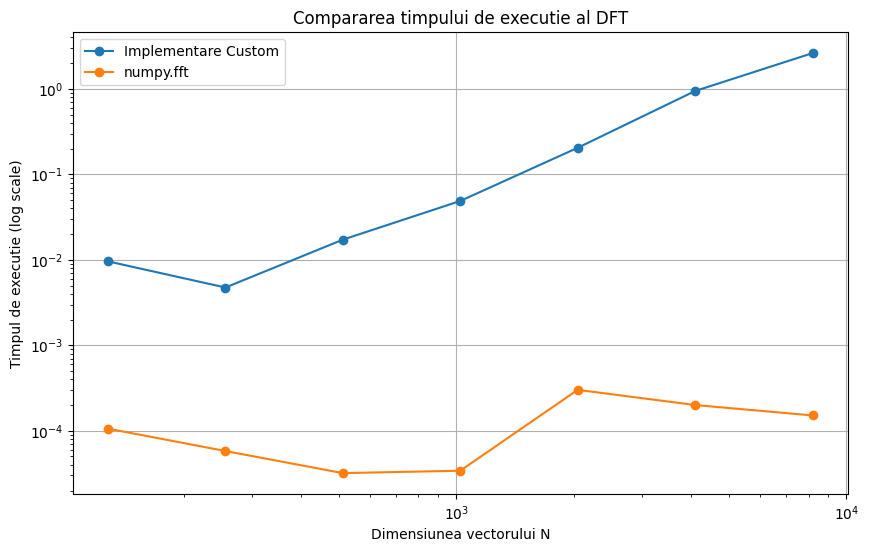

In [3]:
#ex1

import numpy as np
import time
import matplotlib.pyplot as plt

def dft_custom(x):
    N = x.shape[0]
    n1 = np.arange(N)
    k = n1.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n1 / N)
    return np.sqrt(1/N) * np.dot(M, x)

# Dimensiunile vectorilor
N = [128, 256, 512, 1024, 2048, 4096, 8192]

# Listele pentru a stoca timpii de executie
custom_times = []
numpy_times = []

# Masurarea timpilor de executie
for n in N:
    x = np.random.random(n)  # Generarea vectorului

    # Masurarea timpului pentru implementarea custom
    start_time = time.time()
    dft_custom(x)
    custom_times.append(time.time() - start_time)

    # Masurarea timpului pentru numpy.fft
    start_time = time.time()
    np.fft.fft(x)
    numpy_times.append(time.time() - start_time)

# Crearea graficului
plt.figure(figsize=(10, 6))
plt.plot(N, custom_times, 'o-', label='Implementare Custom')
plt.plot(N, numpy_times, 'o-', label='numpy.fft')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dimensiunea vectorului N')
plt.ylabel('Timpul de executie (log scale)')
plt.title('Compararea timpului de executie al DFT')
plt.legend()
plt.grid(True)
plt.show()


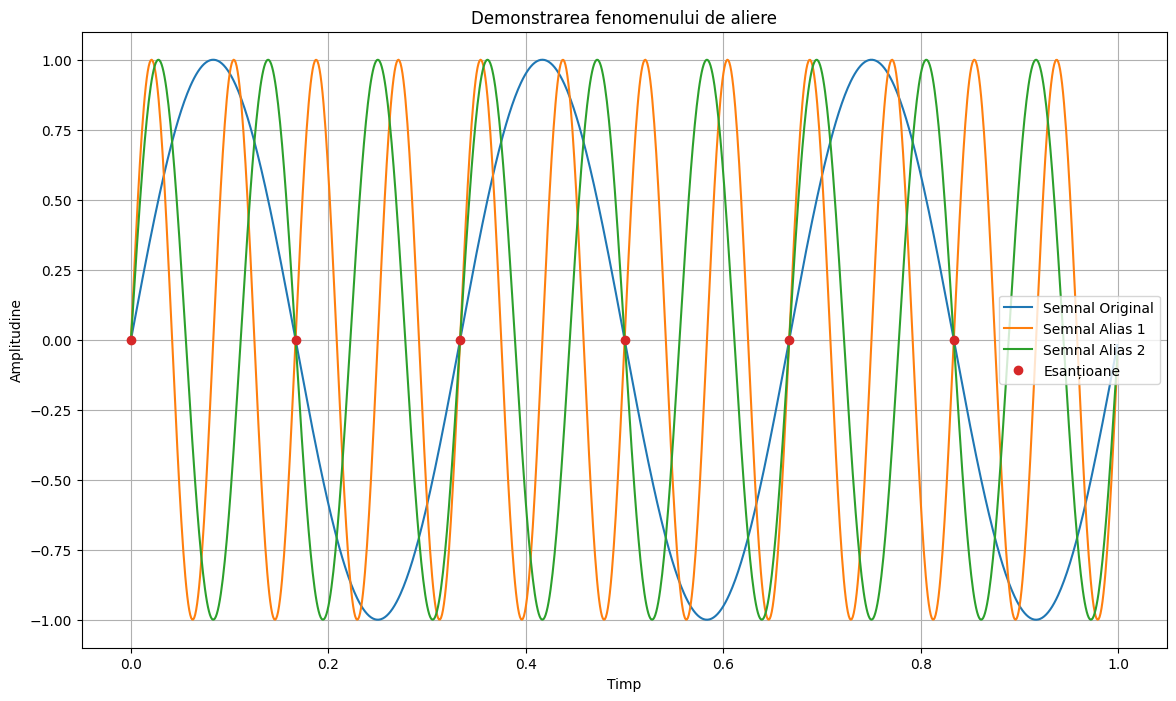

In [12]:
#ex2

import numpy as np
import matplotlib.pyplot as plt

# Setări pentru semnalul sinusoidal
frecventa_semnal = 3  # Frecvența semnalului original
amplitudine = 1       # Amplitudinea semnalului
faza = 0              # Faza semnalului
t = np.linspace(0, 1, 1000, endpoint=False)  # Generarea axei timpului

# Crearea semnalului sinusoidal original
semnal_original = amplitudine * np.sin(2 * np.pi * frecventa_semnal * t + faza)

# Frecvența de esanționare sub-Nyquist
frecventa_esantionare = 2 * frecventa_semnal  # Sub-Nyquist pentru semnalul original

# Esanționarea semnalului original
t_esantionare = np.arange(0, 1, 1/frecventa_esantionare)
semnal_esantionat = amplitudine * np.sin(2 * np.pi * frecventa_semnal * t_esantionare + faza)

# Crearea altor două semnale care vor produce aceleași esanțioane
frecventa_alias1 = frecventa_esantionare + 2 * frecventa_semnal
frecventa_alias2 = frecventa_esantionare + frecventa_semnal

semnal_alias1 = amplitudine * np.sin(2 * np.pi * frecventa_alias1 * t + faza)
semnal_alias2 = amplitudine * np.sin(2 * np.pi * frecventa_alias2 * t + faza)

# Plotarea semnalelor
plt.figure(figsize=(14, 8))

# Semnalul original
plt.plot(t, semnal_original, label='Semnal Original')

# Semnalele alias
plt.plot(t, semnal_alias1, label='Semnal Alias 1')
plt.plot(t, semnal_alias2, label='Semnal Alias 2')

# Esanțioanele semnalului original
plt.plot(t_esantionare, semnal_esantionat, 'o', label='Esanțioane')

plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.title('Demonstrarea fenomenului de aliere')
plt.legend()
plt.grid(True)
plt.show()

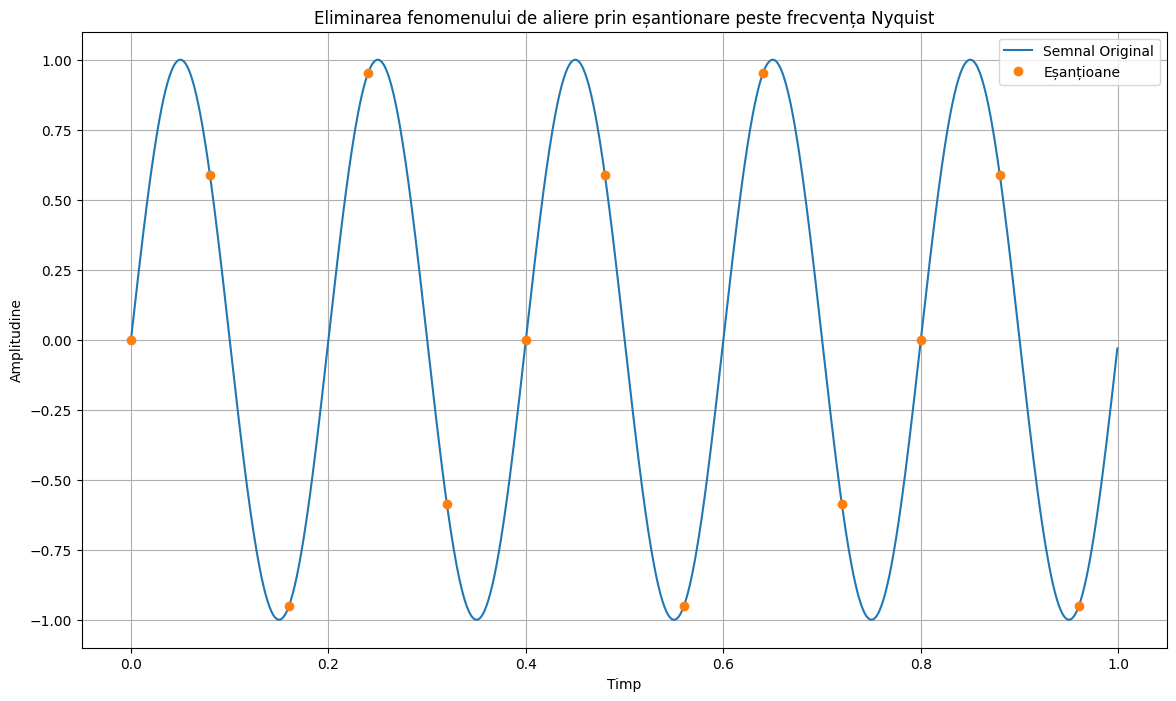

In [13]:
#ex3

import numpy as np
import matplotlib.pyplot as plt

# Setări pentru semnalul sinusoidal
frecventa_semnal = 5  # Frecvența semnalului original
amplitudine = 1       # Amplitudinea semnalului
faza = 0              # Faza semnalului
t = np.linspace(0, 1, 1000, endpoint=False)  # Generarea axei timpului

# Crearea semnalului sinusoidal original
semnal_original = amplitudine * np.sin(2 * np.pi * frecventa_semnal * t + faza)

# Frecvența de eșantionare peste Nyquist
frecventa_esantionare = 2.5 * frecventa_semnal  # Peste Nyquist pentru semnalul original

# Eșantionarea semnalului original
t_esantionare = np.arange(0, 1, 1/frecventa_esantionare)
semnal_esantionat = amplitudine * np.sin(2 * np.pi * frecventa_semnal * t_esantionare + faza)

# Plotarea semnalelor
plt.figure(figsize=(14, 8))

# Semnalul original
plt.plot(t, semnal_original, label='Semnal Original')

# Eșanțioanele semnalului original
plt.plot(t_esantionare, semnal_esantionat, 'o', label='Eșanțioane')

plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.title('Eliminarea fenomenului de aliere prin eșantionare peste frecvența Nyquist')
plt.legend()
plt.grid(True)
plt.show()